In [1]:
import pandas as pd

In [2]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', parse_dates=[0])
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [3]:
miles_df['lag1']= miles_df['MilesMM'].shift(1)

In [8]:
miles_df['MilesMM_diff_1'] = miles_df['MilesMM'].diff(periods=1)

In [9]:
miles_df.head()

,Month,MilesMM,lag1,MilesMM_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

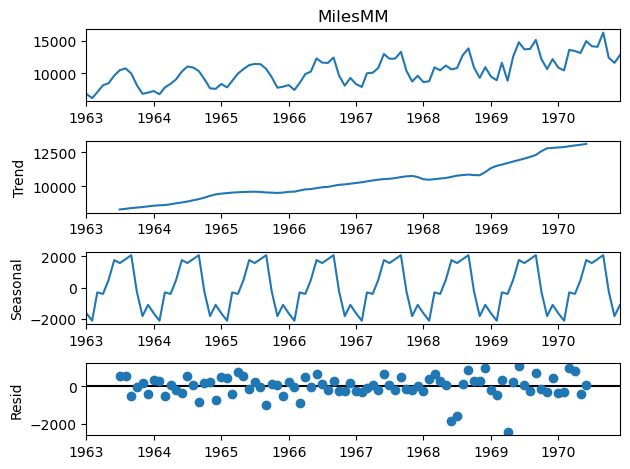

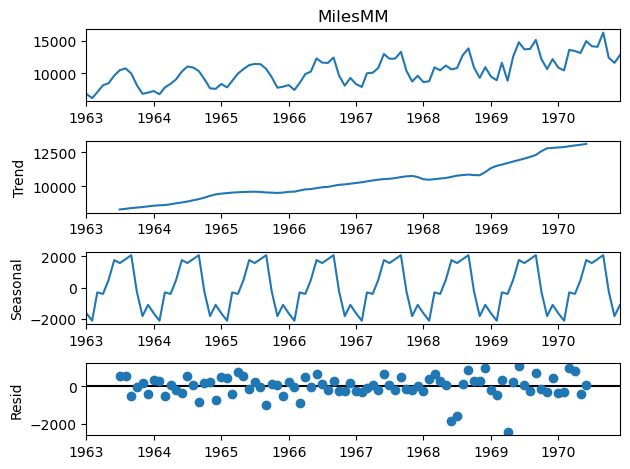

In [11]:
miles_df.index = miles_df['Month']
result_a = seasonal_decompose(miles_df['MilesMM'], model='additive')
result_a.plot()


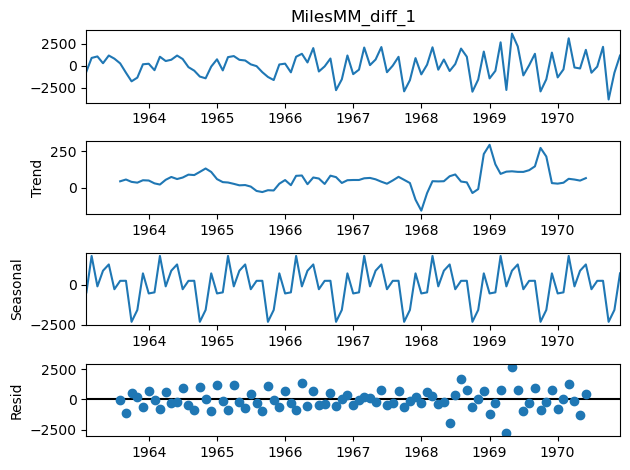

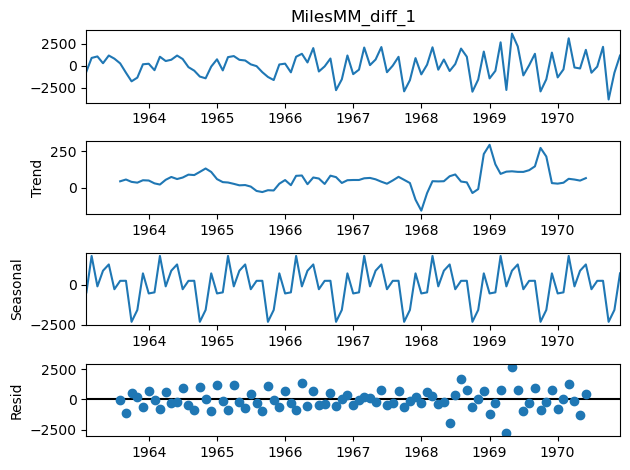

In [12]:
miles_df.index = miles_df['Month']
result_b = seasonal_decompose(miles_df.iloc[1:,3], model='additive')
result_b.plot()

<AxesSubplot: xlabel='Month'>

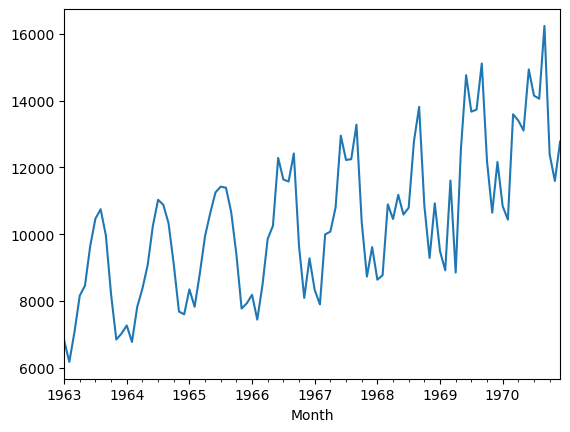

In [14]:
miles_df['MilesMM'].plot()

In [21]:
miles_df['MilesMM_diff_12'] = miles_df['MilesMM_diff_1'].diff(periods=12)

<AxesSubplot: xlabel='Month'>

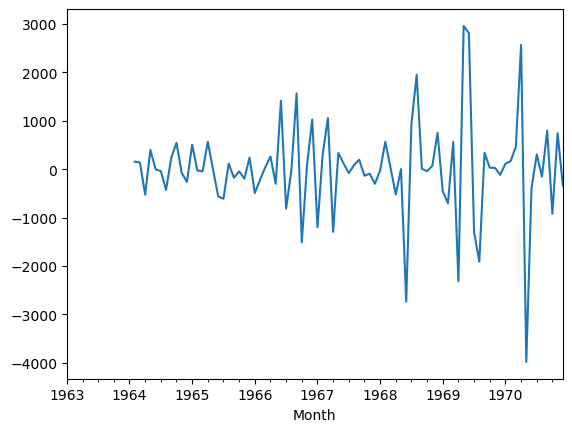

In [22]:
miles_df['MilesMM_diff_12'].plot()

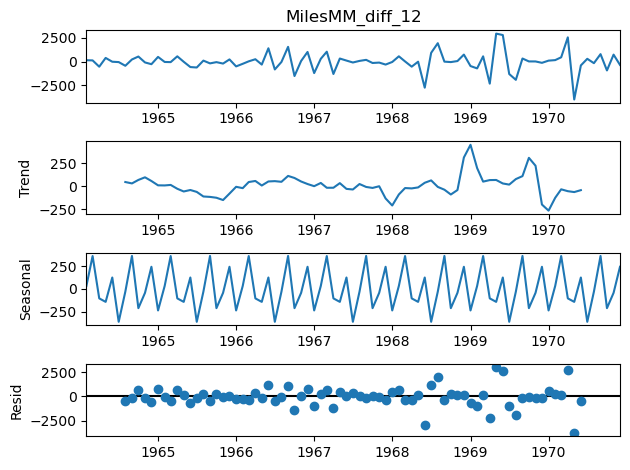

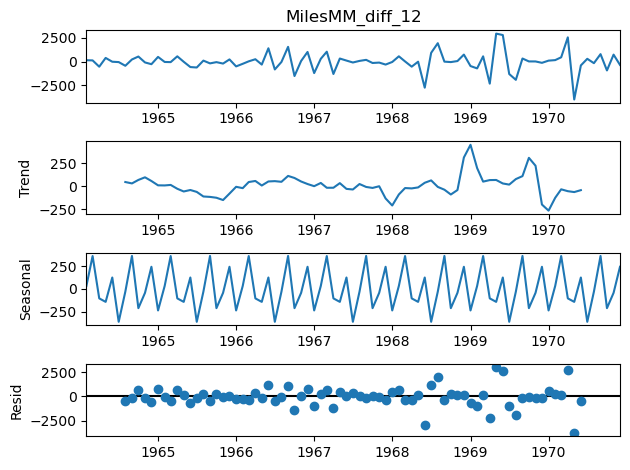

In [24]:
result_c= seasonal_decompose(miles_df.iloc[13:,4], model='additive')
result_c.plot()

In [25]:
miles_df.head(20)

,Month,MilesMM,lag1,MilesMM_diff_1,MilesMM_diff_12
Month,,,,,
1963-01-01,1963-01-01,6827,NaN,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0,NaN
1963-03-01,1963-03-01,7084,6178.0,906.0,NaN
1963-04-01,1963-04-01,8162,7084.0,1078.0,NaN
1963-05-01,1963-05-01,8462,8162.0,300.0,NaN
1963-06-01,1963-06-01,9644,8462.0,1182.0,NaN
1963-07-01,1963-07-01,10466,9644.0,822.0,NaN
1963-08-01,1963-08-01,10748,10466.0,282.0,NaN
1963-09-01,1963-09-01,9963,10748.0,-785.0,NaN


In [26]:
miles_df.shape

(96, 5)